# This file contains the analysis doen as part of the Lending Club Case Study assignment 
Author - Ayan Mitra
Date - Feb 21st, 2024

In [1]:
#Getting required packages for this analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Read the loan.csv 
loan_raw_data = pd.read_csv('loan.csv', low_memory=False)

In [3]:
#check the shape, datatypes, columns, and info
loan_raw_data.shape

(39717, 111)

In [4]:
loan_raw_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
list(loan_raw_data.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [6]:
loan_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#clear all the unecessary fields which don't have any value that can be used for the analysis
loan_raw_data = loan_raw_data.drop(columns=['initial_list_status','pymnt_plan','mths_since_last_major_derog', 'annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'], axis=1)
loan_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

#### Data Cleansing excercise begins here

In [8]:
#Fix the date columns here

def fixDateFormat(dateColumn):
    loan_raw_data[dateColumn] = pd.to_datetime(loan_raw_data[dateColumn], format="%b-%y")
    loan_raw_data[dateColumn] = pd.to_datetime(loan_raw_data[dateColumn], errors="coerce") 

#Fixing issue_d
fixDateFormat('issue_d')

#Fixing issue_d
fixDateFormat('last_pymnt_d')

#Fixing last_credit_pull_d
fixDateFormat('last_credit_pull_d')

#Fixing next_pymnt_d
fixDateFormat('next_pymnt_d')

#Fixing earliest_cr_line
fixDateFormat('earliest_cr_line')


#Fix last_pymnt_d
loan_raw_data.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [9]:
#analyze and cleanup interest rate
loan_raw_data.int_rate.value_counts()
loan_raw_data['int_rate'] = loan_raw_data.int_rate.str.replace('%','').astype('float')
loan_raw_data.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [10]:
#analyze employer (emp_title) and consider blank as not employed
loan_raw_data['emp_title'] =  loan_raw_data['emp_title'].fillna('Not Employed')
loan_raw_data.emp_title.value_counts()

emp_title
Not Employed                       2459
US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
                                   ... 
AMEC                                  1
lee county sheriff                    1
Bacon County Board of Education       1
Hotpads                               1
Evergreen Center                      1
Name: count, Length: 28821, dtype: int64

### Data Analysis Begins Here

In [11]:
#Add a new column to know the number of days the loan was issued and credit line is open - use the 
# last payment date to calculate ths 
loan_raw_data['days_since_opened'] = (loan_raw_data['last_pymnt_d'] - loan_raw_data['issue_d']).dt.days
loan_raw_data['days_since_loc'] = (loan_raw_data['last_pymnt_d'] - loan_raw_data['earliest_cr_line']).dt.days

In [12]:
#categories the issued date with respect to last payment date in different buckets
days_bin_edges = [0,300,600,900,1200,1500,1800,2100,2400,2700,3000]
days_bin_lables = ['0-300','301-600','601-900','901-1200','1201-1500','1501-1800','1801-2100','2101-2400','2401-2700','>2700']

loan_raw_data['issue_date_range'] = pd.cut(loan_raw_data.days_since_opened, 
                                      bins=days_bin_edges, 
                                      labels=days_bin_lables, 
                                      include_lowest=True)

loan_raw_data.issue_date_range.head()

0     901-1200
1      301-600
2     901-1200
3     901-1200
4    1501-1800
Name: issue_date_range, dtype: category
Categories (10, object): ['0-300' < '301-600' < '601-900' < '901-1200' ... '1801-2100' < '2101-2400' < '2401-2700' < '>2700']

In [13]:
#Breakdown the income in very-poor, poor, lower-middle, higher-middle, rich, very-rich buckets for analyais
bin_edges = [0,10000,30000,100000,500000,1000000,6000000]
bin_lables = ['very-poor','poor','lower-middle','higher-middle','rich','very-rich']
loan_raw_data['living_class'] = pd.cut(loan_raw_data.annual_inc, bins=bin_edges, labels=bin_lables, include_lowest=True)

#### Analysing data for with Defaulter Loan Accounts

In [14]:
#get the list of all defaulters for analysis
loan_defaulters = loan_raw_data[loan_raw_data['loan_status'] == 'Charged Off']

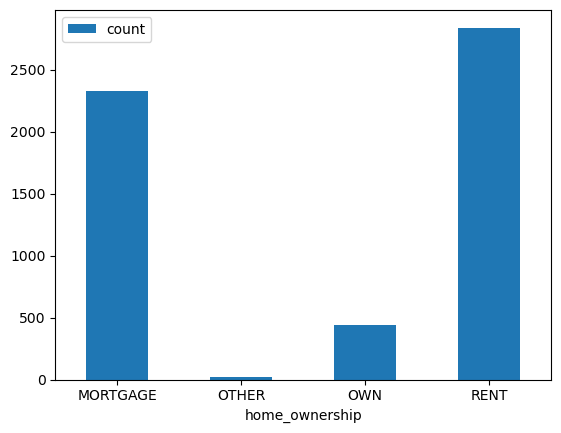

In [15]:
#Segmented Univariate Analysis
#Question = Are people failing to pay loan because of the their home_ownership status
loan_defaulters_home = loan_defaulters.groupby(by='home_ownership')['member_id'].count().reset_index(name='count')
loan_defaulters_home.plot.bar(x='home_ownership',y='count', rot=-0)
plt.show()

#Conclusion = People with rented or mortgaged home are most likely to become defaulters

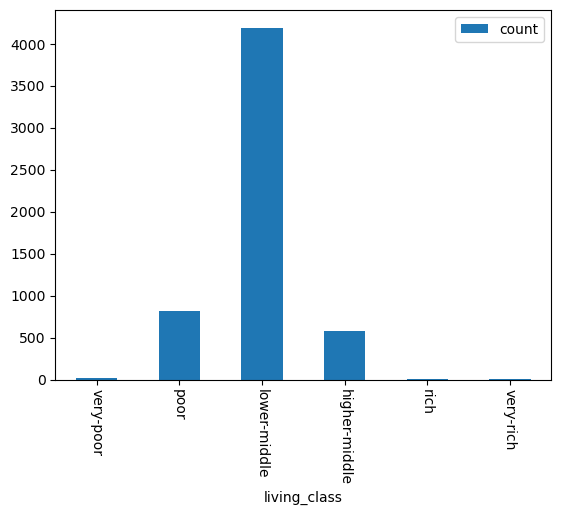

In [16]:
#Segmented Univariate Analysis
#Question = Are people failing to pay loan because of the their income status
loan_income_group = loan_defaulters.groupby(by='living_class')['member_id'].count().reset_index(name='count')
loan_income_group.plot.bar(x='living_class',y='count', rot=-90)
plt.show()

#Conclusion = It seems people with lower middle income group (i.e. people with annual income between)

In [17]:
#perform further analysis on the lower-middle income group people to see what could be the reason for defaulting
loan_defaulters_lower_middle = loan_defaulters[loan_defaulters['living_class'] == 'lower-middle']
loan_defaulters_lower_middle.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,days_since_opened,days_since_loc,issue_date_range,living_class
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,152.39,NaT,2012-08-01,0.0,1,INDIVIDUAL,122.0,2922.0,0-300,lower-middle
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,...,325.74,NaT,2014-03-01,0.0,1,INDIVIDUAL,670.0,8189.0,601-900,lower-middle
24,1069559,1304634,6000,6000,6000.0,36 months,11.71,198.46,B,B3,...,198.46,NaT,2013-03-01,0.0,1,INDIVIDUAL,305.0,4140.0,301-600,lower-middle
26,1069800,1304679,15000,15000,8725.0,36 months,14.27,514.64,C,C2,...,0.00,NaT,2016-05-01,0.0,1,INDIVIDUAL,NaN,NaN,NaN,lower-middle
27,1069657,1304764,5000,5000,5000.0,60 months,16.77,123.65,D,D2,...,123.65,NaT,2013-05-01,0.0,1,INDIVIDUAL,366.0,3349.0,301-600,lower-middle


In [18]:
#Question =  Is the interest rate makes any difference for the defaulting loan
loan_defaulters_lower_middle.int_rate.value_counts()
loan_defaulters_lower_middle.int_rate.max()
#bucket the interest rates into 0-5, 6-10, 11-15, 16-20, 21-25
int_bin_edges = [0,5,10,15,20,25]
int_bin_lables = ['0-5','6-10','11-15','16-20','21-25']
loan_defaulters_lower_middle['int_range'] = pd.cut(loan_defaulters_lower_middle.int_rate, 
                                      bins=int_bin_edges, 
                                      labels=int_bin_lables, 
                                      include_lowest=True)

loan_defaulters_lower_middle.int_range.value_counts()
#Conclusion = we can cleary see if the interest rates are higher than 10% then people tend to default on their loan much higher

C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\2130380220.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_defaulters_lower_middle['int_range'] = pd.cut(loan_defaulters_lower_middle.int_rate,


int_range
11-15    2023
16-20    1355
6-10      598
21-25     220
0-5         0
Name: count, dtype: int64

C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\3879447428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_defaulters_lower_middle['instl_range'] = pd.cut(loan_defaulters_lower_middle.installment,
C:\Users\aymitra\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


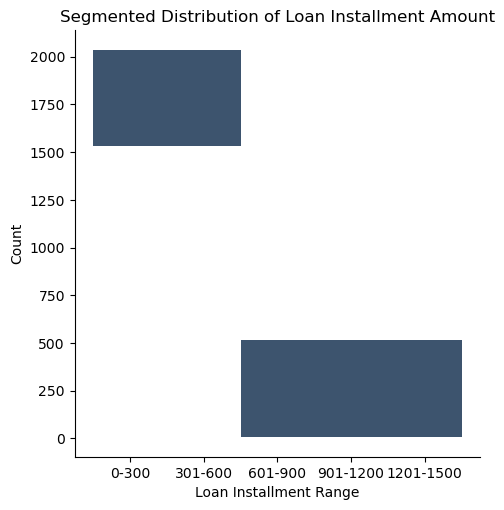

In [19]:
#Question = Is the number of monthly installments has any impact 
instl_bin_edges = [0,300,600,900,1200,1500]
instl_bin_lables = ['0-300','301-600','601-900','901-1200','1201-1500']

loan_defaulters_lower_middle['instl_range'] = pd.cut(loan_defaulters_lower_middle.installment, 
                                      bins=instl_bin_edges, 
                                      labels=instl_bin_lables, 
                                      include_lowest=True)



instl_range_group = loan_defaulters_lower_middle.groupby(by='instl_range')['member_id'].count().reset_index(name='count')
sns.displot(instl_range_group, x='instl_range', y='count')
plt.title('Segmented Distribution of Loan Installment Amount')
plt.xlabel('Loan Installment Range')
plt.ylabel('Count')
plt.show()

#Conclusion = Surprisingly enough we can see people who have a lower installment to pay are defaulting the loan more

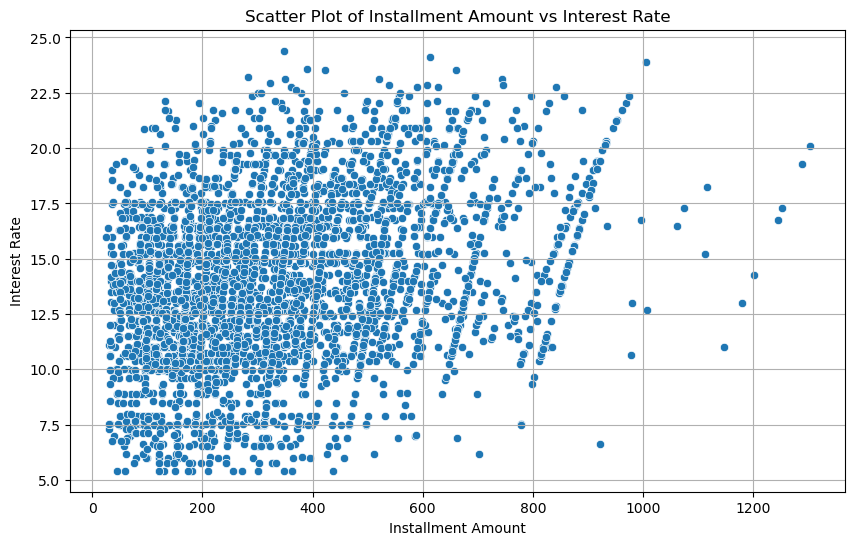

In [20]:
#Question = Does a combination of interest rate and monthly installment togather play a role in loan defaulting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='installment', y='int_rate', data=loan_defaulters_lower_middle)

plt.xlabel('Installment Amount')
plt.ylabel('Interest Rate')
plt.title('Scatter Plot of Installment Amount vs Interest Rate')
plt.grid(True)
plt.show()

#Conclusion = we don't see any specific pattern here expect we can see the density is much higer 
#between installmet amount 0-400 and interest rate between 10% to 17.5%

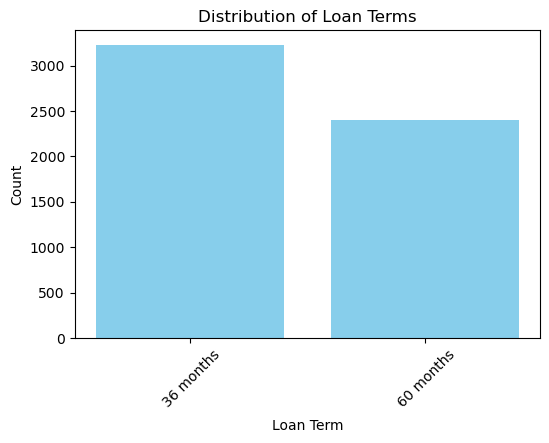

In [21]:
#Looking into other patterns
#Question - does the loan term makes any difference to default the loan 

loan_defaulters_term_count = loan_defaulters.groupby(by='term')['member_id'].count().reset_index(name='len_count')
plt.figure(figsize=(6, 4))
plt.bar(loan_defaulters_term_count.term, loan_defaulters_term_count.len_count, color='skyblue')
plt.title('Distribution of Loan Terms')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

#Conclusion = There is not much difference 

C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\1292986714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_defaulters.emp_title = loan_defaulters.emp_title.str.upper()


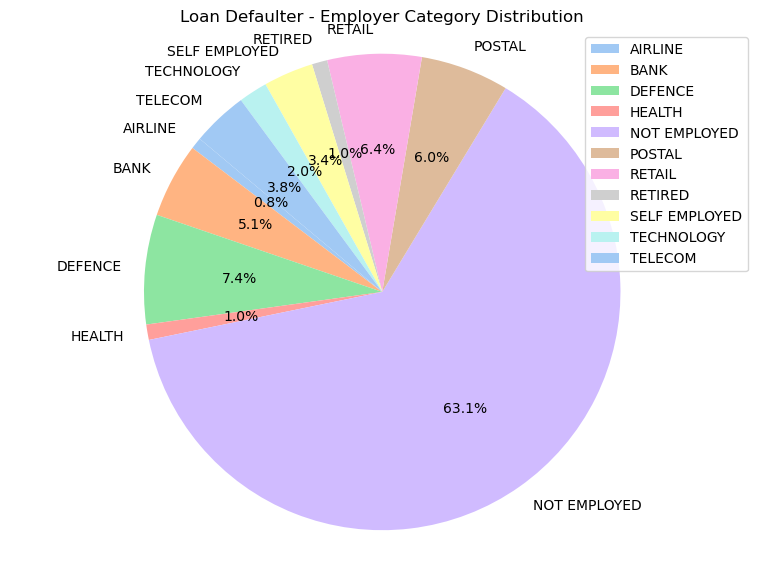

In [22]:
#Question - Does defaulters belongs to the same company / employer
loan_defaulters.emp_title = loan_defaulters.emp_title.str.upper()
loan_defaulters.emp_title


loan_defaulters_emp_raw = loan_defaulters.groupby(by='emp_title')['member_id'].count().reset_index(name='count_emp')

#for sanity, we are interested only with those employers who has more than 5 defaulters
loan_defaulters_emp_raw = loan_defaulters_emp_raw[loan_defaulters_emp_raw.count_emp > 5]


#based on the data in this set, we need to do some cleanup
loan_defaulters_emp_raw

#Do some cleanup before we do the analysis
loan_defaulters_emp_raw['emp_title'].replace('SELF-EMPLOYED','SELF EMPLOYED', inplace=True)
loan_defaulters_emp_raw['emp_title'].replace('SELF','SELF EMPLOYED', inplace=True)
loan_defaulters_emp_raw['emp_title'].replace('UNITED STATES POSTAL SERVICE','USPS', inplace=True)
loan_defaulters_emp_raw['emp_title'].replace('US POSTAL SERVICE','USPS', inplace=True)
loan_defaulters_emp_raw['emp_title'].replace('U.S. ARMY','US ARMY', inplace=True)
loan_defaulters_emp_raw['emp_title'].replace('WAL-MART','WALMART', inplace=True)

loan_defaulters_emp_final = loan_defaulters_emp_raw.groupby(by='emp_title')['count_emp'].sum().reset_index(name='count_emp')
loan_defaulters_emp_final.sort_values('count_emp', ascending=False)

#categories the employers into different buckets
employer_sector = {
    'AMERICAN AIRLINES':'AIRLINE',
    'AT&T':'TELECOM',
    'BANK OF AMERICA':'BANK',
    'DEPARTMENT OF DEFENSE':'DEFENCE',
    'HOME DEPOT':'RETAIL',
    'IBM':'TECHNOLOGY',
    'JP MORGAN CHASE':'BANK',
    'KAISER PERMANENTE':'HEALTH',
    'NORTHROP GRUMMAN':'TECHNOLOGY',
    'NOT EMPLOYED':'NOT EMPLOYED',
    'RETIRED':'RETIRED',
    'SELF EMPLOYED':'SELF EMPLOYED',
    'TARGET':'RETAIL',
    'UPS':'POSTAL',
    'US AIR FORCE':'DEFENCE',
    'US ARMY':'DEFENCE',
    'USMC':'DEFENCE',
    'USPS':'POSTAL',
    'VERIZON WIRELESS':'TELECOM',
    'WALGREENS':'RETAIL',
    'WALMART':'RETAIL',
    'WELLS FARGO':'BANK'
}
loan_defaulters_emp_final['emp_sector'] = loan_defaulters_emp_final.emp_title.map(employer_sector)
loan_defaulters_emp_category = loan_defaulters_emp_final.groupby(by='emp_sector')['count_emp'].sum().reset_index(name='count_emp')

#plot a pie chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')
plt.pie(loan_defaulters_emp_category['count_emp'], 
        labels=loan_defaulters_emp_category['emp_sector'], 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors)
plt.title('Loan Defaulter - Employer Category Distribution')
plt.axis('equal')  
plt.legend(loan_defaulters_emp_category['emp_sector'], loc='upper right', fontsize=10)
plt.tight_layout(pad=2.0)

plt.show()

#Conclusion = We can see 63% of the defaulters are not-employed which seems obvious, however, 
# people employed in defence, and postal and retail follows with a percetange of 7%, and 6% respectively 

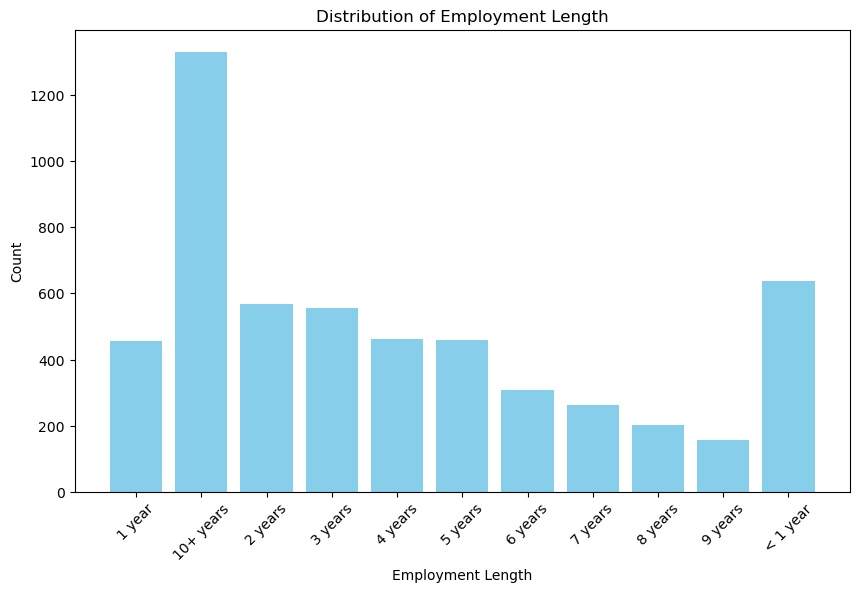

In [23]:
#Question - Does employment length plays a role for defaulting the loan 
loan_defaulters_emp_length = loan_defaulters.groupby(by='emp_length')['member_id'].count().reset_index(name='len_count')
plt.figure(figsize=(10, 6))
plt.bar(loan_defaulters_emp_length.emp_length, loan_defaulters_emp_length.len_count, color='skyblue')
plt.title('Distribution of Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

#Conclusion = We can see surpsingly people with 10+ years of service are defaulting loan more followed by 
# people with < 1 year of service. 

C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\234327305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_defaulters.verification_status.replace('Source Verified','Verified', inplace=True)


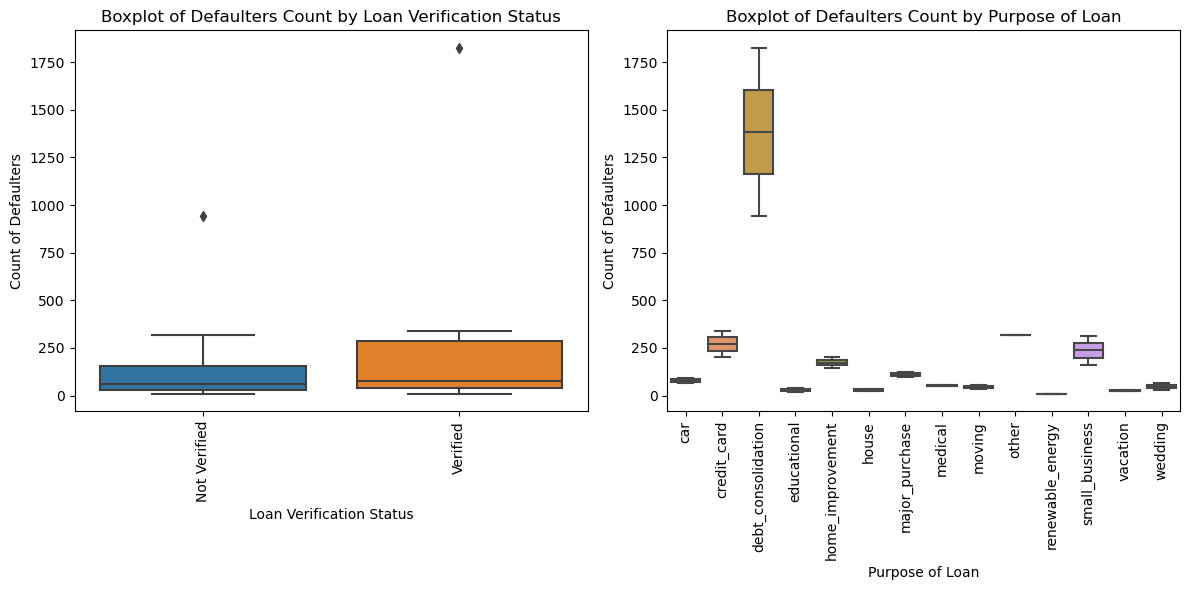

In [24]:
#Question - Does purpose of the loan plays a role for defaulting the loan. Analyze this data 
# with resepect to the income verification status 

#fix the verification status column data
loan_defaulters.verification_status.replace('Source Verified','Verified', inplace=True)

loan_defaulters_verf_purpose = loan_defaulters.groupby(by=['verification_status','purpose'])['member_id'].count().reset_index(name='def_count')

#plot a boxplot to see the categories
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=loan_defaulters_verf_purpose, x='verification_status', y='def_count')
plt.title('Boxplot of Defaulters Count by Loan Verification Status')
plt.xlabel('Loan Verification Status')
plt.ylabel('Count of Defaulters')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=loan_defaulters_verf_purpose, x='purpose', y='def_count')
plt.title('Boxplot of Defaulters Count by Purpose of Loan')
plt.xlabel('Purpose of Loan')
plt.ylabel('Count of Defaulters')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#Conclusion - There are several conclusions from loan verfication status analysis
# 1. The defualters are higher even if the income is verified so income verification may not play a big role in loan defaulting
# 2. The meadian of defaulter count is same in both income verified and not verified categories
# 3. The defualters are higher where people have taken loan for debt consolidation 
# 4. The 25th, meadian and 75th quartiles of the defaulter who have taken loan for credit cards, and small business are same

In [25]:
#Question - Which state has most defaulters
loan_defaulters.addr_state.value_counts()

#Conclusion - This analysis may be insignificant because according to Wikipedia (https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population)
# CA is the most populated states in the US which makes the number of defaulters also higher. 

addr_state
CA    1125
FL     504
NY     495
TX     316
NJ     278
GA     215
IL     197
PA     180
VA     177
MD     162
MA     159
OH     155
WA     127
AZ     123
NC     114
MO     114
NV     108
MI     103
CO      98
CT      94
MN      81
OR      71
SC      66
WI      63
AL      54
LA      53
KY      45
OK      40
UT      40
KS      31
NM      30
HI      28
AR      27
NH      25
RI      25
WV      21
DC      15
AK      15
DE      12
SD      12
MT      11
VT       6
WY       4
NE       3
MS       2
TN       2
ID       1
Name: count, dtype: int64

In [26]:
loan_defaulters.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'days_since_opened',
       'days_since_loc', 'issue_date_range', 'living_class'],
      dtype='object')

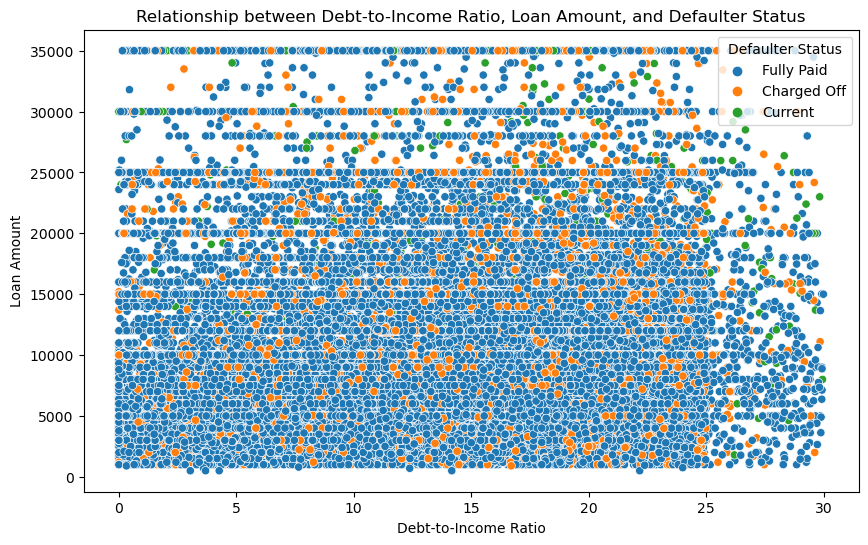

In [27]:
#Question - Is the dti (debt to income) ratio w.r.t. laon amount plays a role for defaulting the loan. 
# Analyze this on the whole dataset  
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_raw_data, x='dti', y='loan_amnt', hue='loan_status')
plt.title('Relationship between Debt-to-Income Ratio, Loan Amount, and Defaulter Status')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Loan Amount')
plt.legend(title='Defaulter Status')
plt.show()

#Conclusion - There is no clear correlation found. 

C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\3735044618.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_defaulters_lower_middle.verification_status.replace('Source Verified','Verified', inplace=True)


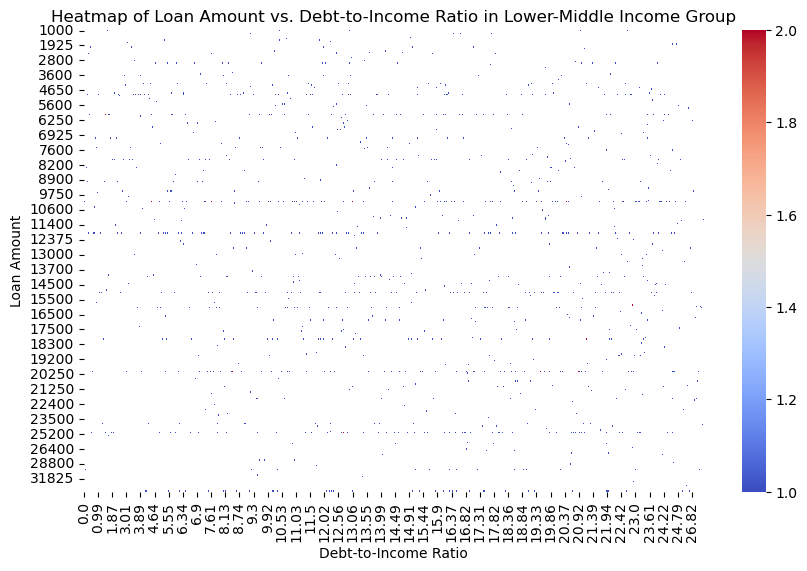

In [28]:
#Question - among the loan defaulters under different lower-middle income group, is there a relation between 
# loan amount and dti. Create a heatmap to see if the loan amount and dti are correlated

loan_defaulters_lower_middle.verification_status.replace('Source Verified','Verified', inplace=True)
loan_defaulters_lower_middle_income_verified= loan_defaulters_lower_middle[loan_defaulters_lower_middle.verification_status == 'Verified']


plt.figure(figsize=(10, 6))
sns.heatmap(loan_defaulters_lower_middle_income_verified.groupby(['loan_amnt', 'dti']).size().unstack(), cmap='coolwarm')
plt.title('Heatmap of Loan Amount vs. Debt-to-Income Ratio in Lower-Middle Income Group')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Loan Amount')
plt.show()

#Conclusion - There is no clear correlation found. 

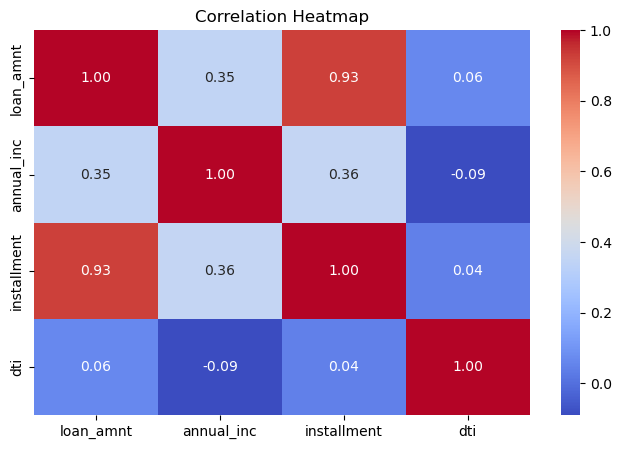

In [29]:
#Question - Among the defaulter what is the correlation between loan amount, annual income, 
# installment amount, and dti 
correlation_matrix = loan_defaulters[['loan_amnt', 'annual_inc', 'installment', 'dti']].corr()
correlation_matrix

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Conclusion = 
#1. The lending club need to very careful while determining the loan amount and the installment amount 
#2. The installment amount is also correlated with annual income of the person


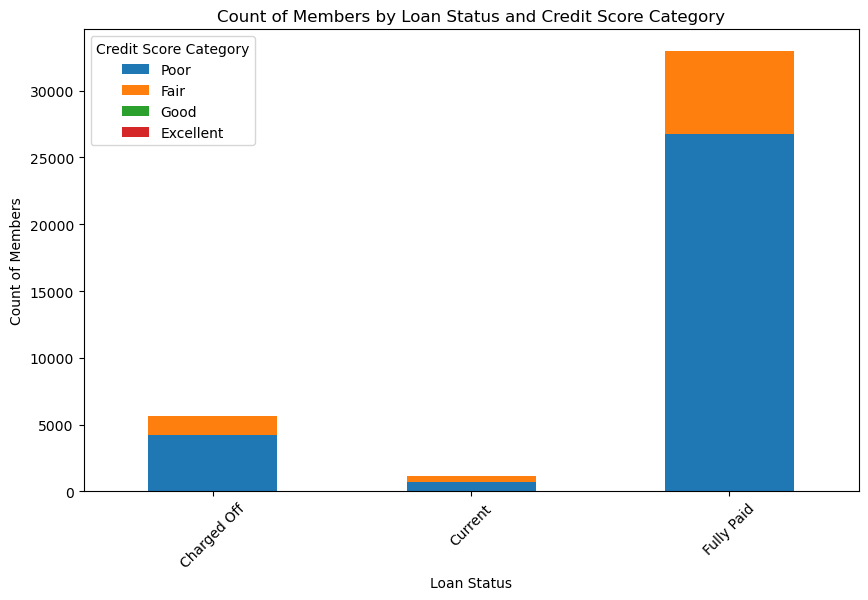

In [30]:
#Question- Calculate a credit score based on the income, dti, loan amount, and installment 
#Then determine how the credit scores are populated among defaulters, current, and paid of loans

# Define features and their weights 
dimensions = ['annual_inc', 'dti', 'loan_amnt', 'installment']
weights = [0.4, 0.3, 0.2, 0.1] 

# Normalize the dimensions 
normalized_features = loan_raw_data[dimensions].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#Calculate a credit score 
loan_raw_data['credit_score'] = (normalized_features * weights).sum(axis=1)

# Define credit score thresholds
bins = [0, 0.3, 0.6, 0.8, 1]
labels = ['Poor', 'Fair', 'Good', 'Excellent']
loan_raw_data['credit_score_category'] = pd.cut(loan_raw_data['credit_score'], bins=bins, labels=labels, right=False)

loan_credit_category = loan_raw_data.groupby(by=['loan_status','credit_score_category'])['member_id'].count().reset_index(name='mem_count')

# Pivot the dataframe for plotting
pivot_df = loan_credit_category.pivot(index='loan_status', columns='credit_score_category', values='mem_count').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Members by Loan Status and Credit Score Category')
plt.xlabel('Loan Status')
plt.ylabel('Count of Members')
plt.xticks(rotation=45)
plt.legend(title='Credit Score Category')
plt.show()


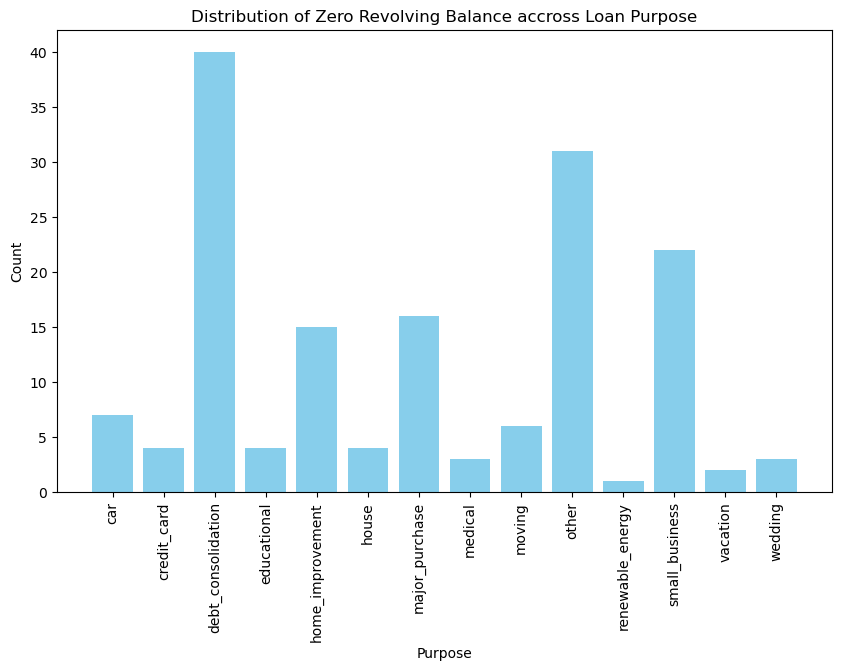

In [31]:
#Question- How the members count with zero reolving balance is spread across various loan purposse
loan_defaulter_revol_bal = loan_defaulters[loan_defaulters.revol_bal == 0].groupby(by='purpose')['member_id'].count().reset_index(name='mem_count')

plt.figure(figsize=(10, 6))
plt.bar(loan_defaulter_revol_bal.purpose, loan_defaulter_revol_bal.mem_count, color='skyblue')
plt.title('Distribution of Zero Revolving Balance accross Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()


#### Analysing data for with Current Loan Accounts

In [32]:
loan_current = loan_raw_data[loan_raw_data.loan_status == 'Current']
loan_current.shape

(1140, 56)

In [33]:
#Question = Perform a loan performance analysis in terms of principle received till date and funded amount 

#first calculate completed term percentage
loan_current['completed_term_percentage'] = (loan_current['total_rec_prncp'] / loan_current['funded_amnt'])*100

loan_cmpl_bin_edges = [0,25,50,75,100]
loan_cmpl_bin_lables = ['0-25','26-50','51-75','76-99']

loan_current['completed_term_percentage_group'] = pd.cut(loan_current.completed_term_percentage, 
                                      bins=loan_cmpl_bin_edges, 
                                      labels=loan_cmpl_bin_lables, 
                                      include_lowest=True)

loan_completion_group = loan_current.groupby(by='completed_term_percentage_group')['member_id'].count().reset_index(name='group_count')
loan_completion_group

#Conclusion = 76% to 99% of all lended loan is already collected which is a good indication

C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\917173792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_current['completed_term_percentage'] = (loan_current['total_rec_prncp'] / loan_current['funded_amnt'])*100
C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\917173792.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_current['completed_term_percentage_group'] = pd.cut(loan_current.completed_term_percentage,


,completed_term_percentage_group,group_count
0,0-25,0
1,26-50,0
2,51-75,0
3,76-99,1140


In [34]:
#Question = Determine outstanding to funded, and late fee to funded ratio in percentages to determine 
# the risk profile of all current loans

#Calculate the ratios in percentages
loan_current['outstanding_to_funded_per'] = (loan_current['out_prncp'] / loan_current['funded_amnt'])*100
loan_current['late_fee_to_funded_per'] = (loan_current['total_rec_late_fee'] / loan_current['funded_amnt'])*100

#Define the bins
loan_current_bin_edges = [0,25,50,75,100]
loan_current_bin_lables = ['0%-25%','26%-50%','51%-75%','76%-100%']

#Allocate bins for each ratio 
loan_current['outstanding_per_bin'] = pd.cut(loan_current.outstanding_to_funded_per, 
                                      bins=loan_current_bin_edges, 
                                      labels=loan_current_bin_lables, 
                                      include_lowest=True)

loan_current['lat_fee_per_bin'] = pd.cut(loan_current.late_fee_to_funded_per, 
                                      bins=loan_current_bin_edges, 
                                      labels=loan_current_bin_lables, 
                                      include_lowest=True)

#loan_current.groupby(by='outstanding_per_bin')['member_id'].count().reset_index(name='mem_count')
loan_current.groupby(by='lat_fee_per_bin')['member_id'].count().reset_index(name='mem_count')

#Conclusion = Both outstanding to funded and late fee to funded ratio percentages are within 0-25% 
#indicating a low risk profile for the lending club

C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\1175547094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_current['outstanding_to_funded_per'] = (loan_current['out_prncp'] / loan_current['funded_amnt'])*100
C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\1175547094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_current['late_fee_to_funded_per'] = (loan_current['total_rec_late_fee'] / loan_current['funded_amnt'])*100
C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\1175547094.p

,lat_fee_per_bin,mem_count
0,0%-25%,1140
1,26%-50%,0
2,51%-75%,0
3,76%-100%,0


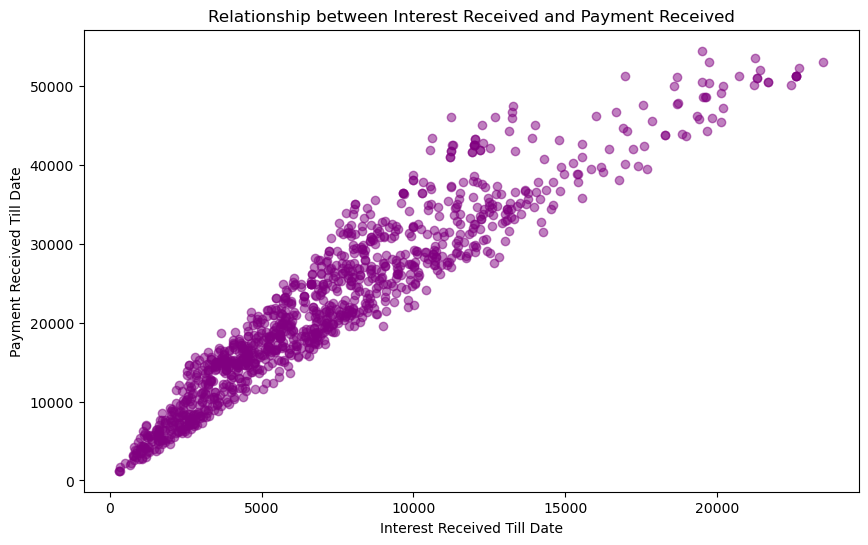

In [35]:
#Question = Determine if the interest received and payment received are related 

plt.figure(figsize=(10, 6))
plt.scatter(loan_current['total_rec_int'], loan_current['total_pymnt'], color='purple', alpha=0.5)
plt.xlabel('Interest Received Till Date')
plt.ylabel('Payment Received Till Date')
plt.title('Relationship between Interest Received and Payment Received')

plt.show()

#Conclusion = We can see a correlation between interest received and payment recieved. The interests are received
#uniformly along with the payments 

C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\830750412.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_current['instl_range'] = pd.cut(loan_current.installment,


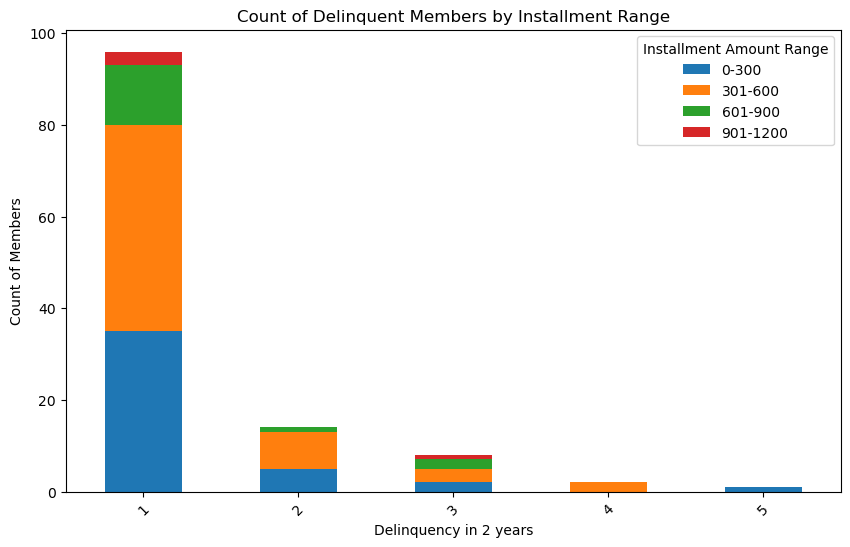

In [36]:
#Question =  Does the installment amount has any role with number of delinquencies in the past 2 years

instl_bin_edges = [0,300,600,900,1200]
instl_bin_lables = ['0-300','301-600','601-900','901-1200']

loan_current['instl_range'] = pd.cut(loan_current.installment, 
                                      bins=instl_bin_edges, 
                                      labels=instl_bin_lables, 
                                      include_lowest=True)



# plt.xlabel('Installment Range')
# plt.ylabel('Count Of Delinquent Members')
# plt.title('Relationship between Intallment Range and Past 2 Years Delinquent Member Count ')
loan_current_pivot=loan_current[loan_current.delinq_2yrs>0].groupby(by=['instl_range','delinq_2yrs'])['member_id'].count().reset_index(name='mem_count')

# Pivot the dataframe for plotting
pivot_df = loan_current_pivot.pivot(index='delinq_2yrs', columns='instl_range', values='mem_count').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Delinquent Members by Installment Range')
plt.xlabel('Delinquency in 2 years')
plt.ylabel('Count of Members')
plt.xticks(rotation=45)
plt.legend(title='Installment Amount Range')
plt.show()

#Conclusion = In the last 2 years, the highest number of times borrowers being delinquent is 1 time, and in that 
# range borrows with installment payment b/w 301-600 dollars are highest in count

#### Analysing data for with Fully Paid Accounts

In [37]:
loan_fully_paid =  loan_raw_data[loan_raw_data.loan_status == 'Fully Paid']
loan_fully_paid.shape

(32950, 56)

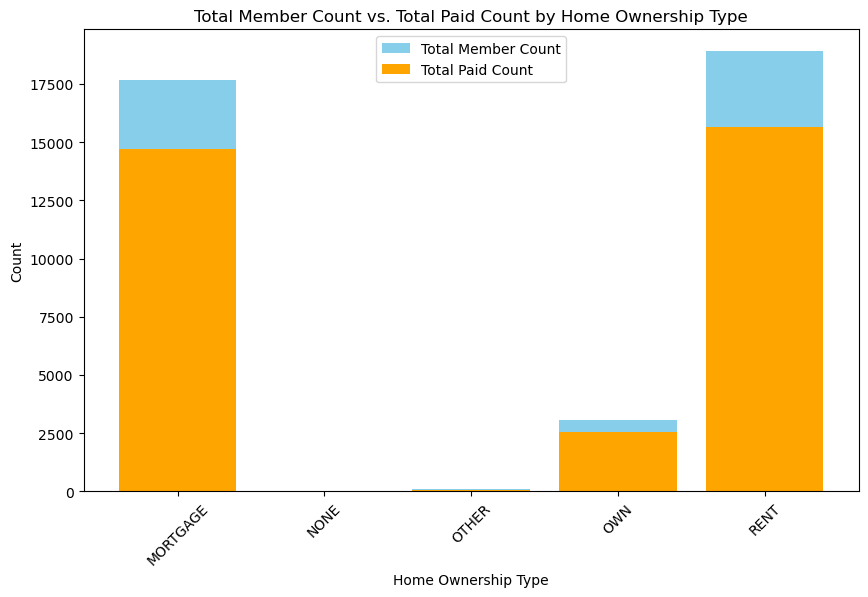

In [38]:
#Question = What is the distribution of Fully Paid Accounts w.r.t. the home ownership of the borrowers

#group the paid loan data
loan_fully_paid_home_ownership = loan_fully_paid.groupby(by='home_ownership')['member_id'].count().reset_index(name='mem_count')

#group the entire dataset 
total_loan_taken = loan_raw_data.groupby(by='home_ownership')['member_id'].count().reset_index(name='mem_count')

#merge the dataframes
merged_data = pd.merge(total_loan_taken, loan_fully_paid_home_ownership, on='home_ownership', suffixes=('_original', '_paid'), how='left')

#plot the data
plt.figure(figsize=(10, 6))
plt.bar(merged_data['home_ownership'], merged_data['mem_count_original'], color='skyblue', label='Total Member Count')
plt.bar(merged_data['home_ownership'], merged_data['mem_count_paid'], color='orange', label='Total Paid Count')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')
plt.title('Total Member Count vs. Total Paid Count by Home Ownership Type')
plt.legend()
plt.xticks(rotation=45)
plt.show()



In [39]:
#Question = What is the distribution of Fully Paid Accounts w.r.t. the Employment Length of the borrowers

#get all the borrowers by employment length
loan_emp_length = loan_raw_data.emp_length.value_counts().reset_index()
loan_emp_length.columns = ['emp_length','mem_count']

#get all the fully paid borrowers by employment length
loan_paid_emp_length = loan_fully_paid.emp_length.value_counts().reset_index()
loan_paid_emp_length.columns = ['emp_length','mem_count']

#merge the dataframes
merged_data = pd.merge(loan_emp_length, loan_paid_emp_length, on='emp_length', suffixes=('_original', '_paid'), how='left')
merged_data['percentage'] =  ((merged_data['mem_count_paid'] / merged_data['mem_count_original'])*100).round(2)
merged_data.sort_values('percentage', ascending=False)

,emp_length,mem_count_original,mem_count_paid,percentage
10,9 years,1258,1068,84.90
2,2 years,4388,3724,84.87
1,< 1 year,4583,3869,84.42
3,3 years,4095,3457,84.42
4,4 years,3436,2880,83.82
6,1 year,3240,2713,83.73
7,6 years,2229,1861,83.49
5,5 years,3282,2736,83.36
9,8 years,1479,1232,83.30
8,7 years,1773,1448,81.67


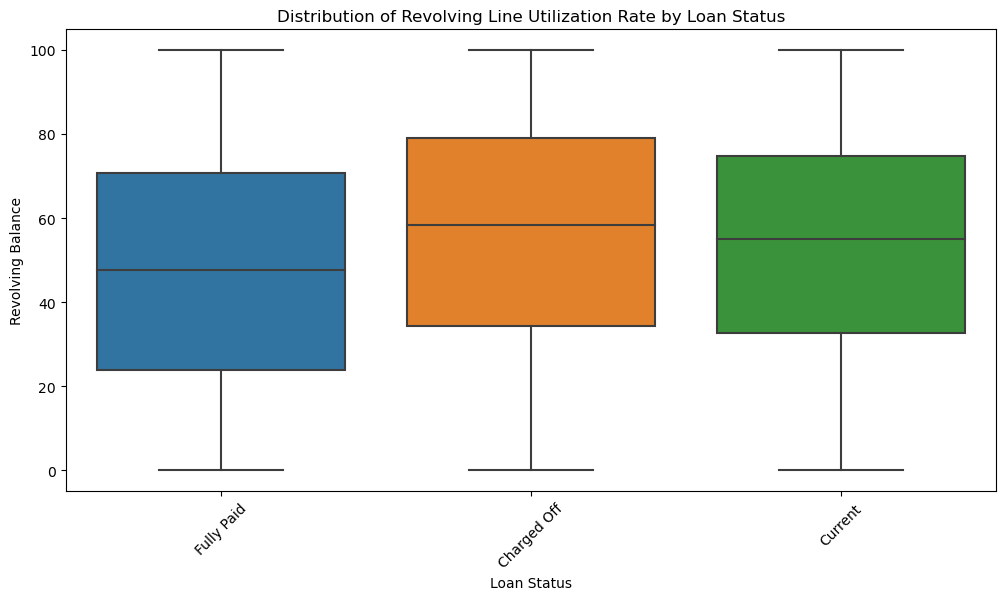

In [40]:
#Question = What is the distribution of the amount of credit the borrower is using 
# relative to all available revolving credit under different loan status
loan_raw_data.revol_util = loan_raw_data.revol_util.str.replace('%','').astype('float64')

plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='revol_util', data=loan_raw_data)
plt.title('Distribution of Revolving Line Utilization Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Revolving Balance')
plt.xticks(rotation=45)
plt.show()

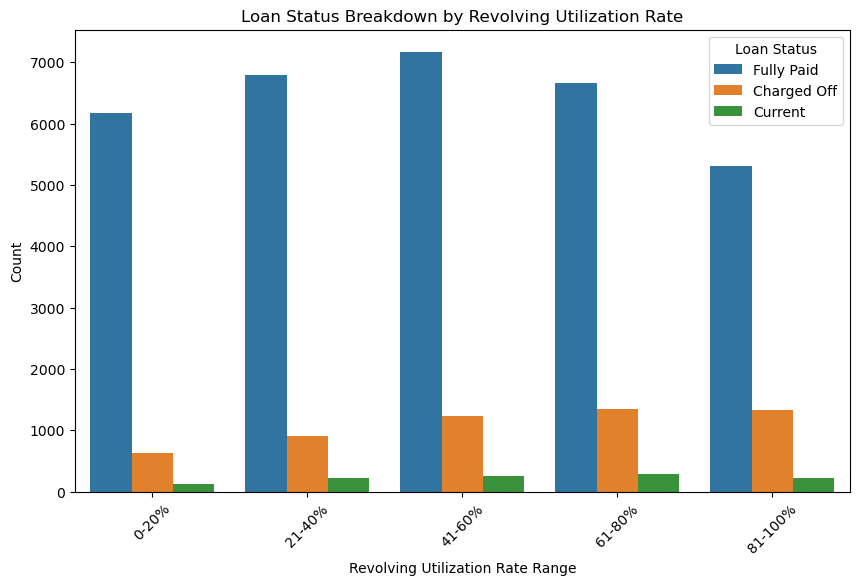

In [41]:
#Plot a bar chart revolving utilization as well. 
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']

# Create a new column for utilization rate range
loan_raw_data['utilization_rate_range'] = pd.cut(loan_raw_data['revol_util'], bins=bins, labels=labels)

# Plot loan status breakdown by utilization rate range
plt.figure(figsize=(10, 6))
sns.countplot(x='utilization_rate_range', hue='loan_status', data=loan_raw_data, order=labels)
plt.title('Loan Status Breakdown by Revolving Utilization Rate')
plt.xlabel('Revolving Utilization Rate Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

C:\Users\aymitra\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\3410435413.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


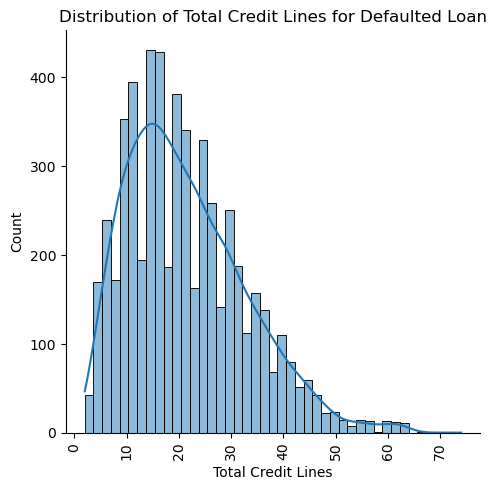

C:\Users\aymitra\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\3410435413.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


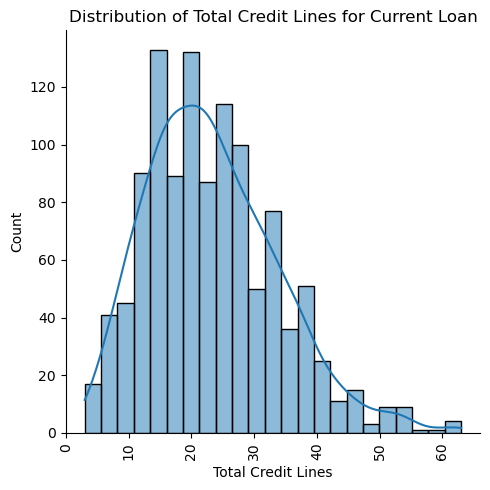

C:\Users\aymitra\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\aymitra\AppData\Local\Temp\ipykernel_33924\3410435413.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


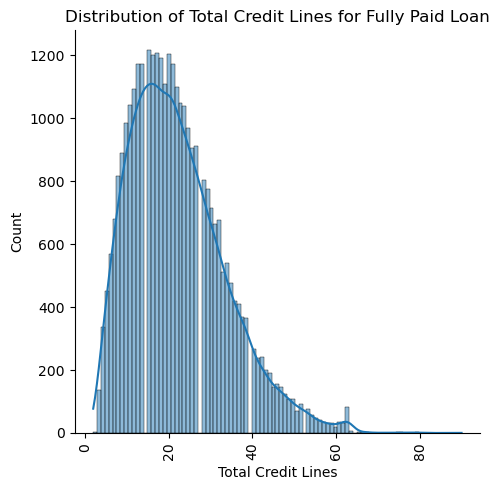

In [42]:
# Question = Perform a risk analysis comparing the total credit lines across loan status

#Defaulters
sns.displot(loan_defaulters["total_acc"], kde=True)
plt.title("Distribution of Total Credit Lines for Defaulted Loan")
plt.xlabel('Total Credit Lines')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Current Loan 
sns.displot(loan_current["total_acc"], kde=True)
plt.title("Distribution of Total Credit Lines for Current Loan")
plt.xlabel('Total Credit Lines')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Fully Paid Loan
sns.displot(loan_fully_paid["total_acc"], kde=True)
plt.title("Distribution of Total Credit Lines for Fully Paid Loan")
plt.xlabel('Total Credit Lines')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



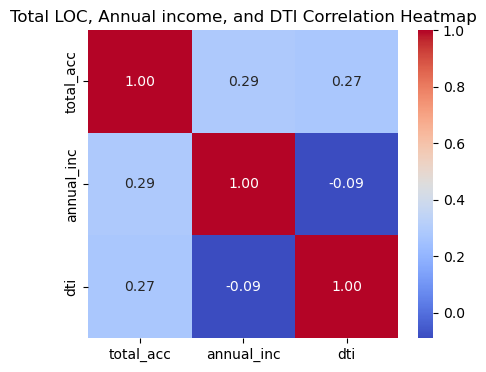

In [43]:
#finally determine a correlation matrix between total loc, annual income, and dti
correlation_matrix_loc_dti = loan_defaulters[['total_acc', 'annual_inc', 'dti']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix_loc_dti, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Total LOC, Annual income, and DTI Correlation Heatmap')
plt.show()

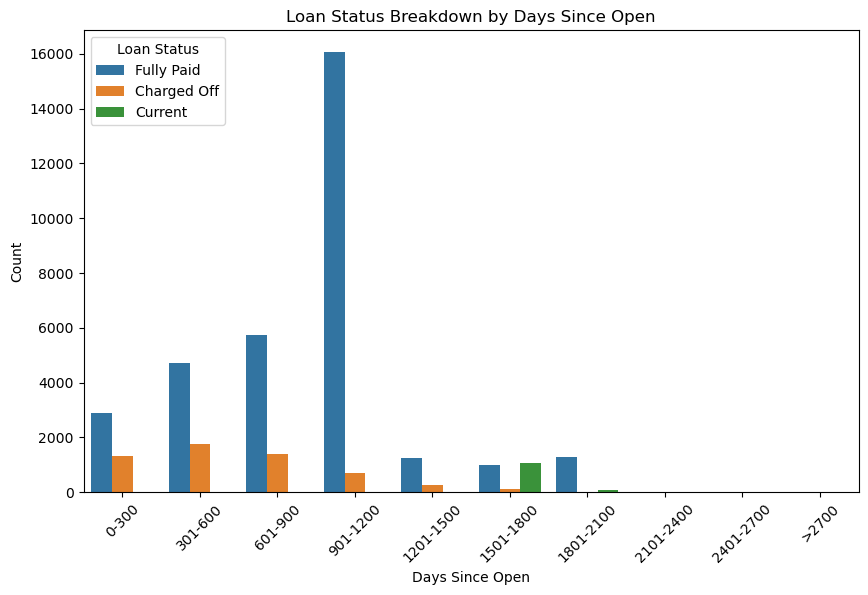

In [49]:
#Question - Analyze the loan data based on when the day since it is opened

# loan_issue_date_group = loan_raw_data.groupby(by=['loan_status','issue_date_range'])['member_id'].count().reset_index(name='mem_count')
# loan_issue_date_group

#loan_raw_data.issue_date_range.head(50)
days_bin_lables = ['0-300','301-600','601-900','901-1200','1201-1500','1501-1800','1801-2100','2101-2400','2401-2700','>2700']
plt.figure(figsize=(10, 6))
sns.countplot(x='issue_date_range', hue='loan_status', data=loan_raw_data, order=days_bin_lables)
plt.title('Loan Status Breakdown by Days Since Open')
plt.xlabel('Days Since Open')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()
